In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [107]:
import cufflinks as cf
import plotly.plotly as py
py.sign_in('ZhaohuiZach', 'd4pjn9ebl6')
cf.set_config_file(world_readable=True,offline=False)

In [108]:
%matplotlib inline

In [109]:
import os

In [110]:
data =pd.read_csv('data.csv')

In [111]:
data.head()

,Country Name,Country Code,Series Name,Series Code,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
0,Argentina,ARG,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.208138e+11,2.626665e+11,3.293175e+11,4.037820e+11,3.766279e+11,4.616402e+11,5.578902e+11,6.043785e+11,6.143835e+11,5.376600e+11
1,Argentina,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,5.640849e+03,6.639909e+03,8.239137e+03,9.999094e+03,9.231383e+03,1.119864e+04,1.339292e+04,1.435741e+04,1.444307e+04,1.250953e+04
2,Argentina,ARG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,7.624486e-01,6.978792e-01,6.919820e-01,6.829941e-01,7.837617e-01,7.477786e-01,7.203260e-01,7.485965e-01,8.234826e-01,7.931637e-01
3,Argentina,ARG,"Population, total",SP.POP.TOTL,3.914549e+07,3.955875e+07,3.996990e+07,4.038186e+07,4.079864e+07,4.122288e+07,4.165562e+07,4.209522e+07,4.253830e+07,4.298003e+07
4,Australia,AUS,GDP at market prices (current US$),NY.GDP.MKTP.CD,6.930755e+11,7.468808e+11,8.530533e+11,1.054558e+12,9.265638e+11,1.142251e+12,1.389919e+12,1.537478e+12,1.563951e+12,1.454675e+12


In [112]:
DS =pd.read_csv('Data_source.csv')

In [113]:
DS

,﻿Code,Indicator Name,Long definition,Source
0,NY.GDP.MKTP.CD,GDP (current US$),GDP at purchaser's prices is the sum of gross ...,"World Bank national accounts data, and OECD Na..."
1,NY.GDP.PCAP.CD,GDP per capita (current US$),GDP per capita is gross domestic product divid...,"World Bank national accounts data, and OECD Na..."
2,MS.MIL.XPND.GD.ZS,Military expenditure (% of GDP),Military expenditures data from SIPRI are deri...,Stockholm International Peace Research Institu...
3,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...


In [114]:
list(data)

['Country Name',
 'Country Code',
 'Series Name',
 'Series Code',
 '2005 [YR2005]',
 '2006 [YR2006]',
 '2007 [YR2007]',
 '2008 [YR2008]',
 '2009 [YR2009]',
 '2010 [YR2010]',
 '2011 [YR2011]',
 '2012 [YR2012]',
 '2013 [YR2013]',
 '2014 [YR2014]']

In [115]:
data = data.rename(columns = {"Country Name":"Country",
                             "2005 [YR2005]":"2005",
                             "2006 [YR2006]":"2006",
                             "2007 [YR2007]":"2007",
                             "2008 [YR2008]":"2008",
                             "2009 [YR2009]":"2009",
                             "2010 [YR2010]":"2010",
                             "2011 [YR2011]":"2011",
                             "2012 [YR2012]":"2012",
                             "2013 [YR2013]":"2013",
                             "2014 [YR2014]":"2014"})

In [116]:
data.head(4)

,Country,Country Code,Series Name,Series Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Argentina,ARG,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.208138e+11,2.626665e+11,3.293175e+11,4.037820e+11,3.766279e+11,4.616402e+11,5.578902e+11,6.043785e+11,6.143835e+11,5.376600e+11
1,Argentina,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,5.640849e+03,6.639909e+03,8.239137e+03,9.999094e+03,9.231383e+03,1.119864e+04,1.339292e+04,1.435741e+04,1.444307e+04,1.250953e+04
2,Argentina,ARG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,7.624486e-01,6.978792e-01,6.919820e-01,6.829941e-01,7.837617e-01,7.477786e-01,7.203260e-01,7.485965e-01,8.234826e-01,7.931637e-01
3,Argentina,ARG,"Population, total",SP.POP.TOTL,3.914549e+07,3.955875e+07,3.996990e+07,4.038186e+07,4.079864e+07,4.122288e+07,4.165562e+07,4.209522e+07,4.253830e+07,4.298003e+07


In [117]:
del data["Country Code"],data["Series Code"]

In [118]:
data.head(6)

,Country,Series Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Argentina,GDP at market prices (current US$),2.208138e+11,2.626665e+11,3.293175e+11,4.037820e+11,3.766279e+11,4.616402e+11,5.578902e+11,6.043785e+11,6.143835e+11,5.376600e+11
1,Argentina,GDP per capita (current US$),5.640849e+03,6.639909e+03,8.239137e+03,9.999094e+03,9.231383e+03,1.119864e+04,1.339292e+04,1.435741e+04,1.444307e+04,1.250953e+04
2,Argentina,Military expenditure (% of GDP),7.624486e-01,6.978792e-01,6.919820e-01,6.829941e-01,7.837617e-01,7.477786e-01,7.203260e-01,7.485965e-01,8.234826e-01,7.931637e-01
3,Argentina,"Population, total",3.914549e+07,3.955875e+07,3.996990e+07,4.038186e+07,4.079864e+07,4.122288e+07,4.165562e+07,4.209522e+07,4.253830e+07,4.298003e+07
4,Australia,GDP at market prices (current US$),6.930755e+11,7.468808e+11,8.530533e+11,1.054558e+12,9.265638e+11,1.142251e+12,1.389919e+12,1.537478e+12,1.563951e+12,1.454675e+12
5,Australia,GDP per capita (current US$),3.398295e+04,3.608486e+04,4.095783e+04,4.962812e+04,4.271513e+04,5.184565e+04,6.221655e+04,6.764610e+04,6.762777e+04,6.192550e+04


In [119]:
Total_Pop = data[data['Series Name']=='Population, total']
del Total_Pop['Series Name']
P = Total_Pop.set_index('Country')
P.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,
Argentina,39145491,39558750,39969903,40381860,40798641,41222875,41655616,42095224,42538304,42980026
Australia,20394800,20697900,20827600,21249200,21691700,22031750,22340024,22728254,23125868,23490736
Brazil,188479240,190698241,192784521,194769696,196701298,198614208,200517584,202401584,204259377,206077898
Canada,32312000,32570505,32887928,33245773,33628571,34005274,34342780,34754312,35158304,35540419
China,1303720000,1311020000,1317885000,1324655000,1331260000,1337705000,1344130000,1350695000,1357380000,1364270000


In [120]:
Total_GDP = data[data['Series Name']=="GDP at market prices (current US$)"]
del Total_GDP['Series Name']
G = Total_GDP.set_index('Country')
G.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,
Argentina,2.208138e+11,2.626665e+11,3.293175e+11,4.037820e+11,3.766279e+11,4.616402e+11,5.578902e+11,6.043785e+11,6.143835e+11,5.376600e+11
Australia,6.930755e+11,7.468808e+11,8.530533e+11,1.054558e+12,9.265638e+11,1.142251e+12,1.389919e+12,1.537478e+12,1.563951e+12,1.454675e+12
Brazil,8.921032e+11,1.107802e+12,1.395938e+12,1.694585e+12,1.664586e+12,2.209433e+12,2.615235e+12,2.413136e+12,2.392082e+12,2.346076e+12
Canada,1.164144e+12,1.310753e+12,1.457872e+12,1.542619e+12,1.370840e+12,1.614014e+12,1.788796e+12,1.832716e+12,1.838964e+12,1.785387e+12
China,2.268599e+12,2.729784e+12,3.523094e+12,4.558431e+12,5.059420e+12,6.039659e+12,7.492432e+12,8.461623e+12,9.490603e+12,1.035483e+13


In [121]:
Military_percent = data[data['Series Name']=="Military expenditure (% of GDP)"]
del Military_percent['Series Name']
Mp = Military_percent.set_index('Country')
Mp.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,
Argentina,0.762449,0.697879,0.691982,0.682994,0.783762,0.747779,0.720326,0.748596,0.823483,0.793164
Australia,1.880242,1.895675,1.890323,1.885833,1.931767,1.951809,1.828989,1.698137,1.686912,1.780064
Brazil,1.523205,1.480869,1.467496,1.442979,1.540875,1.539016,1.412373,1.408395,1.377781,1.344207
Canada,1.115644,1.129837,1.194696,1.253893,1.381359,1.196702,1.145132,1.111754,1.004022,0.977390
China,2.040390,2.075747,2.036420,2.010723,2.209304,2.042049,1.965408,2.004407,2.014902,2.090110


In [122]:
Percap_GDP = data[data['Series Name']=="GDP per capita (current US$)"]
del Percap_GDP['Series Name']
PG = Percap_GDP.set_index('Country')
PG.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,
Argentina,5640.848503,6639.909435,8239.137161,9999.093517,9231.382900,11198.642567,13392.916904,14357.411589,14443.065651,12509.531118
Australia,33982.950427,36084.858978,40957.830439,49628.115127,42715.132262,51845.654861,62216.547129,67646.103853,67627.773335,61925.496062
Brazil,4733.164181,5809.189096,7240.923983,8700.455202,8462.508346,11124.245780,13042.421933,11922.513058,11711.004405,11384.415010
Canada,36028.232490,40243.552284,44328.475377,46400.441846,40764.141347,47463.631192,52086.533525,52733.473689,52305.258394,50235.385509
China,1740.096726,2082.183363,2673.294191,3441.221355,3800.474542,4514.940520,5574.187093,6264.643878,6991.853866,7590.016441


In [123]:
G.dtypes, Mp.dtypes, PG.dtypes, P.dtypes

(2005    float64
 2006    float64
 2007    float64
 2008    float64
 2009    float64
 2010    float64
 2011    float64
 2012    float64
 2013    float64
 2014    float64
 dtype: object, 2005    float64
 2006    float64
 2007    float64
 2008    float64
 2009    float64
 2010    float64
 2011    float64
 2012    float64
 2013    float64
 2014    float64
 dtype: object, 2005    float64
 2006    float64
 2007    float64
 2008    float64
 2009    float64
 2010    float64
 2011    float64
 2012    float64
 2013    float64
 2014    float64
 dtype: object, 2005    float64
 2006    float64
 2007    float64
 2008    float64
 2009    float64
 2010    float64
 2011    float64
 2012    float64
 2013    float64
 2014    float64
 dtype: object)

In [124]:
Total_Military = pd.DataFrame(Mp.values * G.values/100,columns=G.columns,index=G.index)

In [125]:
Total_Military.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,
Argentina,1.683592e+09,1.833095e+09,2.278818e+09,2.757807e+09,2.951865e+09,3.452047e+09,4.018628e+09,4.524356e+09,5.059341e+09,4.264524e+09
Australia,1.303150e+10,1.415843e+10,1.612546e+10,1.988720e+10,1.789906e+10,2.229455e+10,2.542147e+10,2.610848e+10,2.638248e+10,2.589415e+10
Brazil,1.358856e+10,1.640509e+10,2.048534e+10,2.445250e+10,2.564919e+10,3.400352e+10,3.693687e+10,3.398648e+10,3.295766e+10,3.153612e+10
Canada,1.298770e+10,1.480937e+10,1.741714e+10,1.934278e+10,1.893623e+10,1.931494e+10,2.048408e+10,2.037529e+10,1.846360e+10,1.745020e+10
China,4.628827e+10,5.666340e+10,7.174499e+10,9.165744e+10,1.117780e+11,1.233328e+11,1.472568e+11,1.696054e+11,1.912263e+11,2.164274e+11


In [126]:
Per_Military = pd.DataFrame(Total_Military.values / P.values, columns=P.columns,index=P.index)
Per_Military

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,
Argentina,43.008572,46.338550,57.013343,68.293222,72.352045,83.741057,96.472669,107.479078,118.936131,99.221058
Australia,638.961844,684.051554,774.235210,935.903368,825.156976,1011.928135,1137.934003,1148.723346,1140.821035,1102.313363
Brazil,72.095812,86.026454,106.260280,125.545727,130.396673,171.203887,184.207647,167.916092,161.351981,153.030088
Canada,401.946776,454.686551,529.590673,581.811814,563.099338,567.998330,596.459660,586.266488,525.156108,490.995836
China,35.504765,43.220854,54.439490,69.193440,83.964036,92.197302,109.555496,125.568963,140.878989,158.639699
European Union,501.961697,519.778625,585.293341,635.482118,596.321520,566.254488,585.035464,549.409777,552.669575,549.148955
France,837.458454,856.927095,946.605876,1025.352096,1033.705456,950.142925,988.584971,914.613154,946.782140,940.780201
Germany,461.443373,462.442136,517.271689,585.551417,579.628473,565.664157,588.492740,577.810621,591.070203,574.276335
Indonesia,9.486081,11.392440,14.415859,13.732966,13.857149,19.300955,23.847333,31.326676,33.287964,27.590458


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



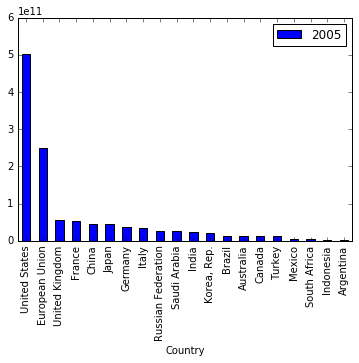

In [127]:
Total_Military2005 = Total_Military[['2005']]
Total_Military2005 = Total_Military2005.sort('2005',ascending=False)
Total_Military2005.plot.bar()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



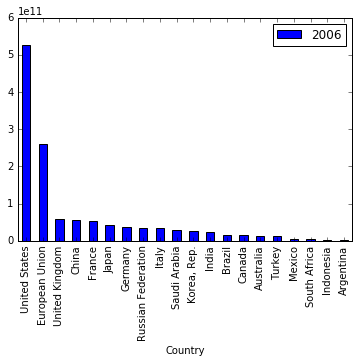

In [128]:
Total_Military2006 = Total_Military[['2006']]
Total_Military2006 = Total_Military2006.sort('2006',ascending=False)
Total_Military2006.plot.bar()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



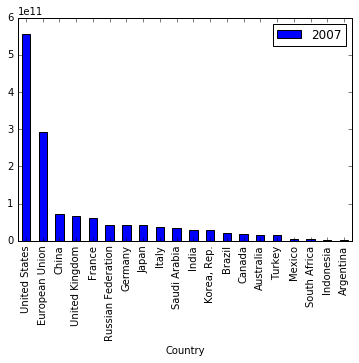

In [129]:
Total_Military2007 = Total_Military[['2007']]
Total_Military2007 = Total_Military2007.sort('2007',ascending=False)
Total_Military2007.plot.bar()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



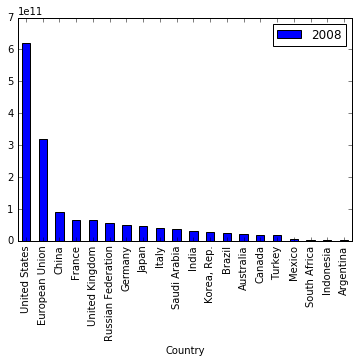

In [130]:
Total_Military2008 = Total_Military[['2008']]
Total_Military2008 = Total_Military2008.sort('2008',ascending=False)
Total_Military2008.plot.bar()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



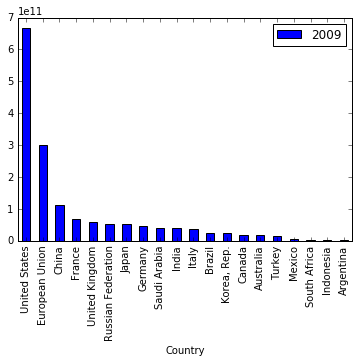

In [131]:
Total_Military2009 = Total_Military[['2009']]
Total_Military2009 = Total_Military2009.sort('2009',ascending=False)
Total_Military2009.plot.bar()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



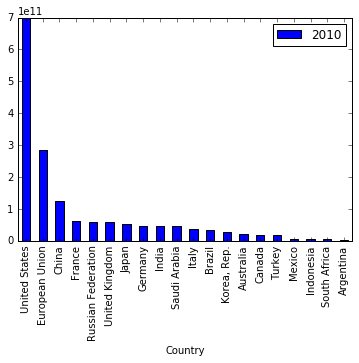

In [132]:
Total_Military2010 = Total_Military[['2010']]
Total_Military2010 = Total_Military2010.sort('2010',ascending=False)
Total_Military2010.plot.bar()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



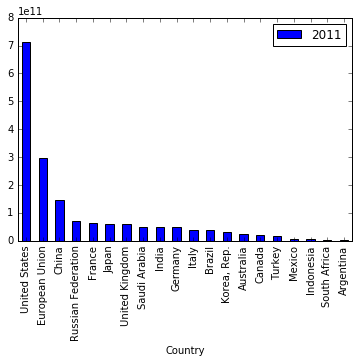

In [133]:
Total_Military2011 = Total_Military[['2011']]
Total_Military2011 = Total_Military2011.sort('2011',ascending=False)
Total_Military2011.plot.bar()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



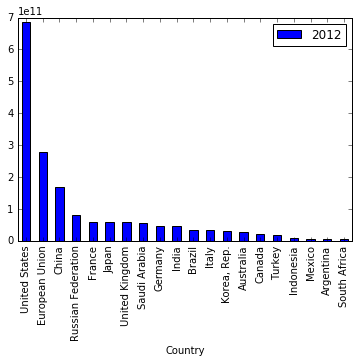

In [134]:
Total_Military2012 = Total_Military[['2012']]
Total_Military2012 = Total_Military2012.sort('2012',ascending=False)
Total_Military2012.plot.bar()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



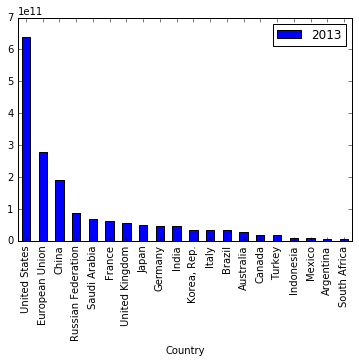

In [135]:
Total_Military2013 = Total_Military[['2013']]
Total_Military2013 = Total_Military2013.sort('2013',ascending=False)
Total_Military2013.plot.bar()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



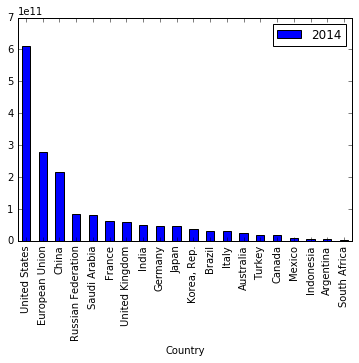

In [136]:
Total_Military2014 = Total_Military[['2014']]
Total_Military2014 = Total_Military2014.sort('2014',ascending=False)
Total_Military2014.plot.bar()

In [137]:
Mp = Mp.T
Mp.iplot(kind='scatter', filename='cufflinks/cf-simple-line')


In [138]:
Total_Military.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,
Argentina,1.683592e+09,1.833095e+09,2.278818e+09,2.757807e+09,2.951865e+09,3.452047e+09,4.018628e+09,4.524356e+09,5.059341e+09,4.264524e+09
Australia,1.303150e+10,1.415843e+10,1.612546e+10,1.988720e+10,1.789906e+10,2.229455e+10,2.542147e+10,2.610848e+10,2.638248e+10,2.589415e+10
Brazil,1.358856e+10,1.640509e+10,2.048534e+10,2.445250e+10,2.564919e+10,3.400352e+10,3.693687e+10,3.398648e+10,3.295766e+10,3.153612e+10
Canada,1.298770e+10,1.480937e+10,1.741714e+10,1.934278e+10,1.893623e+10,1.931494e+10,2.048408e+10,2.037529e+10,1.846360e+10,1.745020e+10
China,4.628827e+10,5.666340e+10,7.174499e+10,9.165744e+10,1.117780e+11,1.233328e+11,1.472568e+11,1.696054e+11,1.912263e+11,2.164274e+11


In [139]:
MilitarySpending = Total_Military
MilitarySpending = MilitarySpending.reset_index()
MilitarySpending.head()

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Argentina,1.683592e+09,1.833095e+09,2.278818e+09,2.757807e+09,2.951865e+09,3.452047e+09,4.018628e+09,4.524356e+09,5.059341e+09,4.264524e+09
1,Australia,1.303150e+10,1.415843e+10,1.612546e+10,1.988720e+10,1.789906e+10,2.229455e+10,2.542147e+10,2.610848e+10,2.638248e+10,2.589415e+10
2,Brazil,1.358856e+10,1.640509e+10,2.048534e+10,2.445250e+10,2.564919e+10,3.400352e+10,3.693687e+10,3.398648e+10,3.295766e+10,3.153612e+10
3,Canada,1.298770e+10,1.480937e+10,1.741714e+10,1.934278e+10,1.893623e+10,1.931494e+10,2.048408e+10,2.037529e+10,1.846360e+10,1.745020e+10
4,China,4.628827e+10,5.666340e+10,7.174499e+10,9.165744e+10,1.117780e+11,1.233328e+11,1.472568e+11,1.696054e+11,1.912263e+11,2.164274e+11


In [140]:
MilitarySpending.iplot(kind='pie',labels='Country',values='2005')

In [141]:
MilitarySpending.iplot(kind='pie',labels='Country',values='2006')

In [142]:
MilitarySpending.iplot(kind='pie',labels='Country',values='2007')

In [143]:
MilitarySpending.iplot(kind='pie',labels='Country',values='2008')

In [144]:
MilitarySpending.iplot(kind='pie',labels='Country',values='2009')

In [145]:
MilitarySpending.iplot(kind='pie',labels='Country',values='2010')

In [146]:
MilitarySpending.iplot(kind='pie',labels='Country',values='2011')

In [147]:
MilitarySpending.iplot(kind='pie',labels='Country',values='2012')

In [148]:
MilitarySpending.iplot(kind='pie',labels='Country',values='2013')

In [149]:
MilitarySpending.iplot(kind='pie',labels='Country',values='2014')

In [150]:
PM = Per_Military.rename(columns={'2005':'2005PM','2006':'2006PM','2007':'2007PM','2008':'2008PM','2009':'2009PM',
                                    '2010':'2010PM','2011':'2011PM','2012':'2012PM','2013':'2013PM','2014':'2014PM',})
PM.head()

,2005PM,2006PM,2007PM,2008PM,2009PM,2010PM,2011PM,2012PM,2013PM,2014PM
Country,,,,,,,,,,
Argentina,43.008572,46.338550,57.013343,68.293222,72.352045,83.741057,96.472669,107.479078,118.936131,99.221058
Australia,638.961844,684.051554,774.235210,935.903368,825.156976,1011.928135,1137.934003,1148.723346,1140.821035,1102.313363
Brazil,72.095812,86.026454,106.260280,125.545727,130.396673,171.203887,184.207647,167.916092,161.351981,153.030088
Canada,401.946776,454.686551,529.590673,581.811814,563.099338,567.998330,596.459660,586.266488,525.156108,490.995836
China,35.504765,43.220854,54.439490,69.193440,83.964036,92.197302,109.555496,125.568963,140.878989,158.639699


In [151]:
PG = PG.rename(columns={'2005':'2005PG','2006':'2006PG','2007':'2007PG','2008':'2008PG','2009':'2009PG',
                                    '2010':'2010PG','2011':'2011PG','2012':'2012PG','2013':'2013PG','2014':'2014PG',})
PG.head()

,2005PG,2006PG,2007PG,2008PG,2009PG,2010PG,2011PG,2012PG,2013PG,2014PG
Country,,,,,,,,,,
Argentina,5640.848503,6639.909435,8239.137161,9999.093517,9231.382900,11198.642567,13392.916904,14357.411589,14443.065651,12509.531118
Australia,33982.950427,36084.858978,40957.830439,49628.115127,42715.132262,51845.654861,62216.547129,67646.103853,67627.773335,61925.496062
Brazil,4733.164181,5809.189096,7240.923983,8700.455202,8462.508346,11124.245780,13042.421933,11922.513058,11711.004405,11384.415010
Canada,36028.232490,40243.552284,44328.475377,46400.441846,40764.141347,47463.631192,52086.533525,52733.473689,52305.258394,50235.385509
China,1740.096726,2082.183363,2673.294191,3441.221355,3800.474542,4514.940520,5574.187093,6264.643878,6991.853866,7590.016441


In [152]:
PMPG = PM.join(PG)
PMPG.head()

,2005PM,2006PM,2007PM,2008PM,2009PM,2010PM,2011PM,2012PM,2013PM,2014PM,2005PG,2006PG,2007PG,2008PG,2009PG,2010PG,2011PG,2012PG,2013PG,2014PG
Country,,,,,,,,,,,,,,,,,,,,
Argentina,43.008572,46.338550,57.013343,68.293222,72.352045,83.741057,96.472669,107.479078,118.936131,99.221058,5640.848503,6639.909435,8239.137161,9999.093517,9231.382900,11198.642567,13392.916904,14357.411589,14443.065651,12509.531118
Australia,638.961844,684.051554,774.235210,935.903368,825.156976,1011.928135,1137.934003,1148.723346,1140.821035,1102.313363,33982.950427,36084.858978,40957.830439,49628.115127,42715.132262,51845.654861,62216.547129,67646.103853,67627.773335,61925.496062
Brazil,72.095812,86.026454,106.260280,125.545727,130.396673,171.203887,184.207647,167.916092,161.351981,153.030088,4733.164181,5809.189096,7240.923983,8700.455202,8462.508346,11124.245780,13042.421933,11922.513058,11711.004405,11384.415010
Canada,401.946776,454.686551,529.590673,581.811814,563.099338,567.998330,596.459660,586.266488,525.156108,490.995836,36028.232490,40243.552284,44328.475377,46400.441846,40764.141347,47463.631192,52086.533525,52733.473689,52305.258394,50235.385509
China,35.504765,43.220854,54.439490,69.193440,83.964036,92.197302,109.555496,125.568963,140.878989,158.639699,1740.096726,2082.183363,2673.294191,3441.221355,3800.474542,4514.940520,5574.187093,6264.643878,6991.853866,7590.016441


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



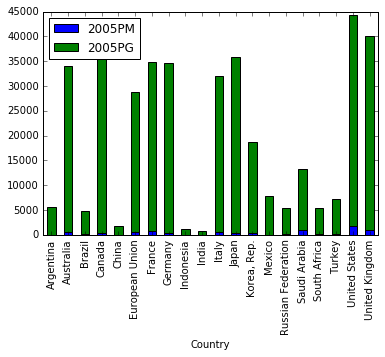

In [153]:
PMPG2005 = PMPG[['2005PM','2005PG']]
PMPG2005['2005PG'] = PMPG2005['2005PG']-PMPG2005['2005PM']
PMPG2005.plot.bar(stacked=True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



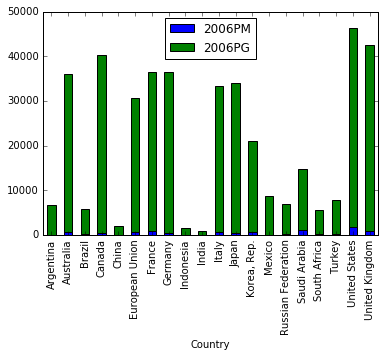

In [154]:
PMPG2006 = PMPG[['2006PM','2006PG']]
PMPG2006['2006PG'] = PMPG2006['2006PG']-PMPG2006['2006PM']
PMPG2006.plot.bar(stacked=True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



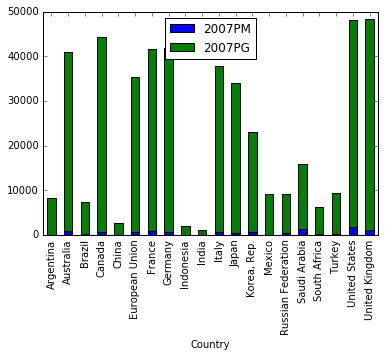

In [155]:
PMPG2007 = PMPG[['2007PM','2007PG']]
PMPG2007['2007PG'] = PMPG2007['2007PG']-PMPG2007['2007PM']
PMPG2007.plot.bar(stacked=True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



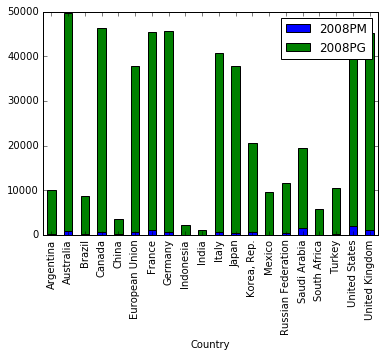

In [156]:
PMPG2008 = PMPG[['2008PM','2008PG']]
PMPG2008['2008PG'] = PMPG2008['2008PG']-PMPG2008['2008PM']
PMPG2008.plot.bar(stacked=True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



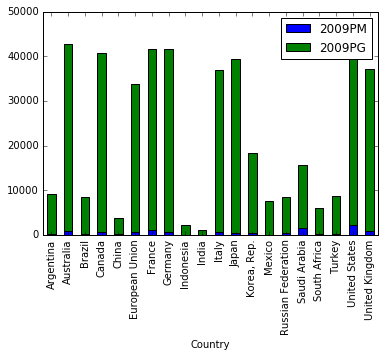

In [157]:
PMPG2009 = PMPG[['2009PM','2009PG']]
PMPG2009['2009PG'] = PMPG2009['2009PG']-PMPG2009['2009PM']
PMPG2009.plot.bar(stacked=True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



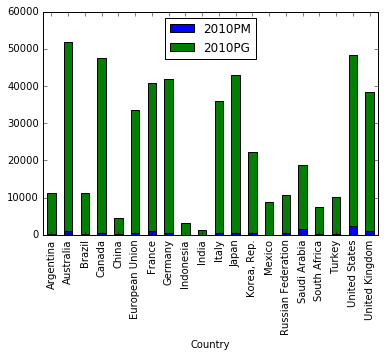

In [158]:
PMPG2010 = PMPG[['2010PM','2010PG']]
PMPG2010['2010PG'] = PMPG2010['2010PG']-PMPG2010['2010PM']
PMPG2010.plot.bar(stacked=True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



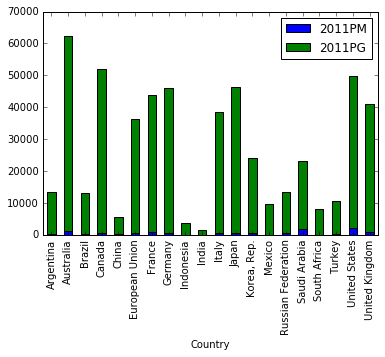

In [159]:
PMPG2011 = PMPG[['2011PM','2011PG']]
PMPG2011['2011PG'] = PMPG2011['2011PG']-PMPG2011['2011PM']
PMPG2011.plot.bar(stacked=True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



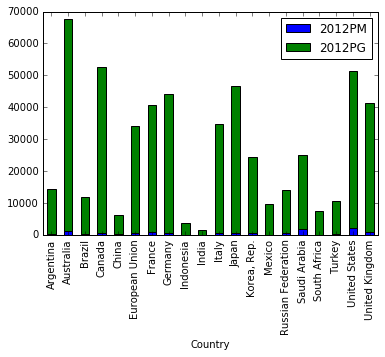

In [160]:
PMPG2012 = PMPG[['2012PM','2012PG']]
PMPG2012['2012PG'] = PMPG2012['2012PG']-PMPG2012['2012PM']
PMPG2012.plot.bar(stacked=True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



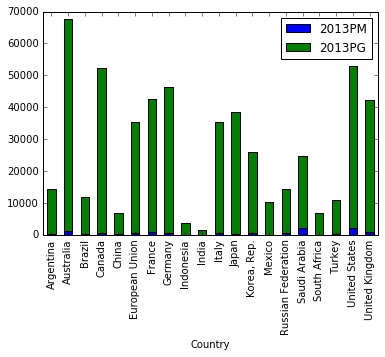

In [161]:
PMPG2013 = PMPG[['2013PM','2013PG']]
PMPG2013['2013PG'] = PMPG2013['2013PG']-PMPG2013['2013PM']
PMPG2013.plot.bar(stacked=True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



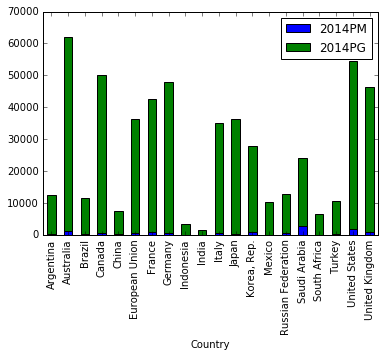

In [162]:
PMPG2014 = PMPG[['2014PM','2014PG']]
PMPG2014['2014PG'] = PMPG2014['2014PG']-PMPG2014['2014PM']
PMPG2014.plot.bar(stacked=True)

In [163]:
Total_Military.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,
Argentina,1.683592e+09,1.833095e+09,2.278818e+09,2.757807e+09,2.951865e+09,3.452047e+09,4.018628e+09,4.524356e+09,5.059341e+09,4.264524e+09
Australia,1.303150e+10,1.415843e+10,1.612546e+10,1.988720e+10,1.789906e+10,2.229455e+10,2.542147e+10,2.610848e+10,2.638248e+10,2.589415e+10
Brazil,1.358856e+10,1.640509e+10,2.048534e+10,2.445250e+10,2.564919e+10,3.400352e+10,3.693687e+10,3.398648e+10,3.295766e+10,3.153612e+10
Canada,1.298770e+10,1.480937e+10,1.741714e+10,1.934278e+10,1.893623e+10,1.931494e+10,2.048408e+10,2.037529e+10,1.846360e+10,1.745020e+10
China,4.628827e+10,5.666340e+10,7.174499e+10,9.165744e+10,1.117780e+11,1.233328e+11,1.472568e+11,1.696054e+11,1.912263e+11,2.164274e+11


In [164]:
cf.set_config_file(offline=False, world_readable=True, theme='pearl')

In [165]:
Total_Military = Total_Military.T
Total_Military.iplot(subplots=True,  shared_xaxes=True, fill=True, filename='cufflinks/simple-subplots')